In [1]:
import pymc as pm
import arviz as az
import numpy as np
import scipy
import pytensor.tensor as at
import pytensor
import pytensor_special as pts

In [2]:
N_sample = 1000
nrow = 2
sample_x = scipy.stats.expon(scale=1/5).rvs((N_sample, 2))

/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Sampling: [normal, x]


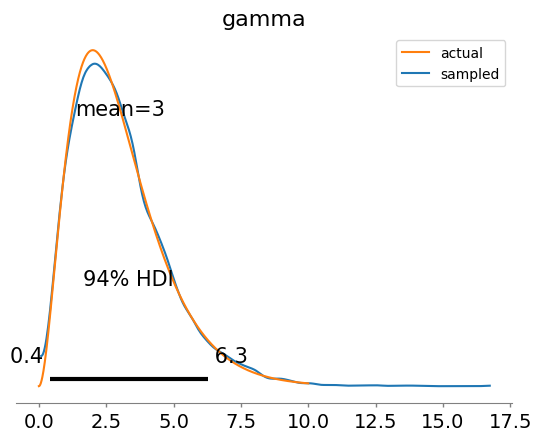

In [3]:
test_alpha = 3.
test_beta = 1.

with pm.Model() as model:
    std_normal = pm.Normal("normal", mu=0, sigma=1)
    uniform = pts.ndtr(0, 10, std_normal*10)
    gamma = pm.Deterministic("gamma", pts.gammaincinv(test_alpha, uniform)/test_beta)

    x = pm.Exponential("x", lam=gamma, observed=sample_x)

    idata = pm.sample_prior_predictive(10_000)

ax = az.plot_posterior(idata, var_names=["gamma"], group="prior")
x = np.linspace(0, 10, 1000)
ax.plot(x, scipy.stats.gamma(a = test_alpha, scale = 1/test_beta).pdf(x), color="C1", label="actual")
ax.plot([], [], color="C0", label="sampled")
ax.legend()

In [4]:
with model:
    trace = pm.sample(1_000, tune=1_000)
    idata.extend(trace)

/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700

/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/home/default/anaconda3/envs/pymc5/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:700: UserWarning: Optimization Warning: The Op gammaincinv does not provide a C

array([[<AxesSubplot: title={'center': 'normal'}>,
        <AxesSubplot: title={'center': 'normal'}>],
       [<AxesSubplot: title={'center': 'gamma'}>,
        <AxesSubplot: title={'center': 'gamma'}>]], dtype=object)

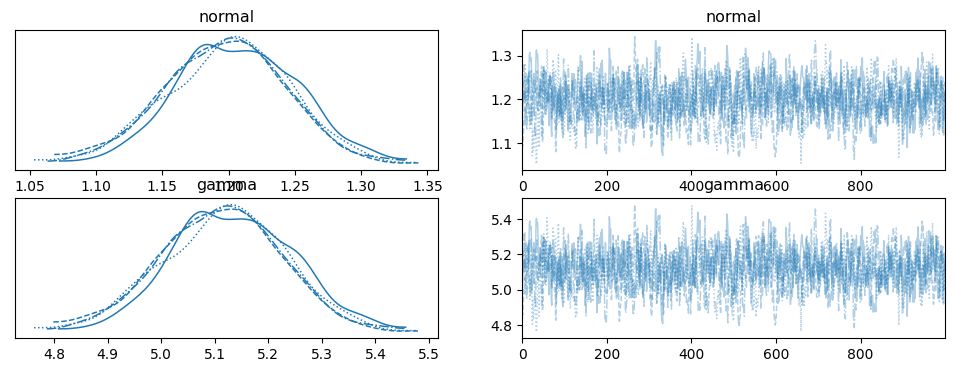

In [5]:
az.plot_trace(trace)